# **DEMO DAY**
## *Marco A Mariño S*
### *Febrero 11 de 2022*

***

## **Cálculo KPIS**
### Disponibilidad - Sovi - Precio - Satisfacción

***

## **Proceso de transformación de datos a partir de información cruda hasta obtener la calificación para cada punto de venta para los KPIS definidos**

### *Se levanta información clave de diferentes tipos de cervezas, en 20 puntos de venta ubicados en Colombia y México, buscando que nuestro cliente tenga un panorama medible de la ejecución realizada y pueda obtener datos cuantitativos que lo lleven a mejorar su estrategia*

***

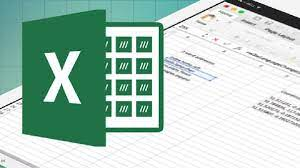 --->>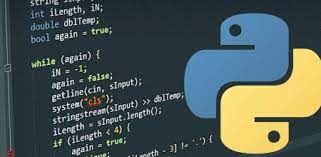 --->>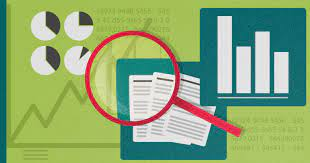

**Datos crudos e insumos**  --------------------------------->> **Procesamiento de datos** ---------------------------------->> **Salida para análisis**

***

***

In [ ]:
#Imports a utilizar

In [1]:
import pandas as pd
import numpy as np
import pyodbc as py

***

## **Conexión SQL, obtener listado de KPIS**
 ### dataFrame que contiene el listado de KPIs y sus características que se deben obtener luego de procesar la información ###

In [2]:
direccion_servidor = 'DESKTOP-0BLEISJ'
nombre_bd = 'CursoPython'
nombre_usuario = 'marco'
password = 'marco'
conn = py.connect('DRIVER={SQL Server};SERVER=' + direccion_servidor + ';DATABASE=' + nombre_bd + ';UID=' + nombre_usuario + ';PWD=' + password, autocommit=True) 

df_Kpis = pd.read_sql("SELECT * FROM dbo.Kpis", conn)
df_Kpis

,KpiID,KpiNombre,KpiTarget,KpiPeso
0,1,Disponibilidad,0.80,0.3
1,2,Sovi,0.60,0.3
2,3,Precio,0.80,0.3
3,4,Satisfacción,0.75,0.1


In [29]:
#Lectura de documentos fuente ---- Insumos de cliente, Datos crudos de auditorías levantadas en los puntos de venta
#Se transforma cada hoja del documento fuente en un dataFrame de Pandas

In [3]:
df_StoreList = pd.read_excel(io = "BaseAudits.xlsx", sheet_name = "StoreList")
df_SkuList = pd.read_excel(io = "BaseAudits.xlsx", sheet_name = "SkuList")
#df_Kpis = pd.read_excel(io = "BaseAudits.xlsx", sheet_name = "Kpis")
df_RawData = pd.read_excel(io = "BaseAudits.xlsx", sheet_name = "RawData")

***

In [31]:
#dataFrame que contiene el listado de puntos de venta medidos y sus características generales

In [4]:
df_StoreList

,PdvID,PdvNombre,PdvPais,PdvCiudad,AuditoriaID
0,10001,El porvenir,Colombia,Bogotá,7001001
1,10002,La campiña,Colombia,Bogotá,7001002
2,10003,El sol,Colombia,Bogotá,7001003
3,10004,Fuente dorada,Colombia,Bogotá,7001004
4,10005,El corazón,Colombia,Bogotá,7001005
5,10006,Concordia,Colombia,Medellín,7001006
6,10007,El pilar,Colombia,Medellín,7001007
7,10008,Cuatro esquinas,Colombia,Medellín,7001008
8,10009,La esquina,Colombia,Medellín,7001009
9,10010,Dos puertos,Colombia,Medellín,7001010


In [35]:
#dataFrame que contiene el listado de cervezas y las características que se van a analizar de acuerdo a las necesidades del cliente

In [5]:
df_SkuList

,SkuID,SkuNombre,SkuFabricante,Competencia,SkuPrecioSugerido
0,5000,Cerveza Aguila,Bavaria,NO,2000
1,5001,Cerveza Aguila Cero,Bavaria,NO,2100
2,5002,Cerveza Poker,Bavaria,NO,1900
3,5003,Cerveza Costeña,Bavaria,NO,1800
4,5004,Cerveza Pilsen,Bavaria,NO,2000
5,5005,Cerveza Andina,Central Cervecera,SI,0
6,5006,Cerveza 3 Cordilleras,Central Cervecera,SI,0
7,5007,Cerveza Miller,Central Cervecera,SI,0
8,5008,Cerveza Corona Extra,Grupo Modelo,NO,30
9,5009,Cerveza Modelo Especial,Grupo Modelo,NO,31


In [38]:
#dataFrame que contiene la información cruda levantada en cada punto de venta, información sin ningún tipo de tratamiento

In [6]:
df_RawData

,Consecutivo,AuditoID,Variable_01,Variable_02,Pregunta,Respuesta
0,1,7001001,PDV_01,PDV_01,Codigo del Punto de Venta,10001
1,2,7001001,FECHA_AUDIT,FECHA_AUDIT,Fecha de la auditoría,20220205
2,3,7001001,DISP_5000,5000,SKU Disponible?,NO
3,4,7001001,DISP_5001,5001,SKU Disponible?,SI
4,5,7001001,DISP_5002,5002,SKU Disponible?,SI
...,...,...,...,...,...,...
535,536,7001020,PREC_5012,5012,Precio del SKU,30
536,537,7001020,SATISF_01,SATISF_01,Está stisfecho con el servicio brindado por Gr...,SI
537,538,7001020,SATISF_02,SATISF_02,Grupo Modelo está pendiente de sus necesidades?,SI
538,539,7001020,SATISF_03,SATISF_03,El portafolio de Grupo Modelo es variado?,SI


***

**Armado de dataFrame maestro uniendo las características de punto de venta y productos con la informacoón cruda levantada, esto con el fin de tener un repositorio central con información más detallada y legible.**

***

In [8]:
df_StoreRawData_Temp01 = pd.merge(df_StoreList, df_RawData, left_on = "AuditoriaID", right_on = "AuditoID")
df_StoreRawData = pd.merge(df_StoreRawData_Temp01, df_SkuList, left_on = "Variable_02", right_on = "SkuID", how = "left").fillna("")
df_StoreRawData["Respuesta"] = df_StoreRawData_Temp01["Respuesta"].replace(["SI"], ["1"])
df_StoreRawData["Respuesta"] = df_StoreRawData["Respuesta"].replace(["NO"], ["0"])
df_StoreRawData

,PdvID,PdvNombre,PdvPais,PdvCiudad,AuditoriaID,Consecutivo,AuditoID,Variable_01,Variable_02,Pregunta,Respuesta,SkuID,SkuNombre,SkuFabricante,Competencia,SkuPrecioSugerido
0,10001,El porvenir,Colombia,Bogotá,7001001,1,7001001,PDV_01,PDV_01,Codigo del Punto de Venta,10001,,,,,
1,10001,El porvenir,Colombia,Bogotá,7001001,2,7001001,FECHA_AUDIT,FECHA_AUDIT,Fecha de la auditoría,20220205,,,,,
2,10001,El porvenir,Colombia,Bogotá,7001001,3,7001001,DISP_5000,5000,SKU Disponible?,0,5000,Cerveza Aguila,Bavaria,NO,2000
3,10001,El porvenir,Colombia,Bogotá,7001001,4,7001001,DISP_5001,5001,SKU Disponible?,1,5001,Cerveza Aguila Cero,Bavaria,NO,2100
4,10001,El porvenir,Colombia,Bogotá,7001001,5,7001001,DISP_5002,5002,SKU Disponible?,1,5002,Cerveza Poker,Bavaria,NO,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,10020,El poórtico,México,Acapulco,7001020,536,7001020,PREC_5012,5012,Precio del SKU,30,5012,Cerveza Bocanegra,Grupo Modelo,NO,30
536,10020,El poórtico,México,Acapulco,7001020,537,7001020,SATISF_01,SATISF_01,Está stisfecho con el servicio brindado por Gr...,1,,,,,
537,10020,El poórtico,México,Acapulco,7001020,538,7001020,SATISF_02,SATISF_02,Grupo Modelo está pendiente de sus necesidades?,1,,,,,
538,10020,El poórtico,México,Acapulco,7001020,539,7001020,SATISF_03,SATISF_03,El portafolio de Grupo Modelo es variado?,1,,,,,


***

In [41]:
#Crear función para segmentar el dataFrame maestro según el KPI buscado, de esta manera obtenemos secciones que solo contienen la info necesaria para el cálculo
#Recibe un dataFrame y el nombre del KPI ----> devuelve un dataFrame con la información de el KPI ingresado

In [9]:
def crearRawDataKpi (dataFrame, kpi):
    df01 = dataFrame["Variable_01"].str.contains(kpi)
    df = dataFrame[df01]
    return df

***

In [42]:
#Creación del dataFrame para el KPI de Disponibilidad

In [10]:
df_Disponibilidad = crearRawDataKpi(df_StoreRawData, "DISP_")
df_Disponibilidad

,PdvID,PdvNombre,PdvPais,PdvCiudad,AuditoriaID,Consecutivo,AuditoID,Variable_01,Variable_02,Pregunta,Respuesta,SkuID,SkuNombre,SkuFabricante,Competencia,SkuPrecioSugerido
2,10001,El porvenir,Colombia,Bogotá,7001001,3,7001001,DISP_5000,5000,SKU Disponible?,0,5000,Cerveza Aguila,Bavaria,NO,2000
3,10001,El porvenir,Colombia,Bogotá,7001001,4,7001001,DISP_5001,5001,SKU Disponible?,1,5001,Cerveza Aguila Cero,Bavaria,NO,2100
4,10001,El porvenir,Colombia,Bogotá,7001001,5,7001001,DISP_5002,5002,SKU Disponible?,1,5002,Cerveza Poker,Bavaria,NO,1900
5,10001,El porvenir,Colombia,Bogotá,7001001,6,7001001,DISP_5003,5003,SKU Disponible?,1,5003,Cerveza Costeña,Bavaria,NO,1800
6,10001,El porvenir,Colombia,Bogotá,7001001,7,7001001,DISP_5004,5004,SKU Disponible?,1,5004,Cerveza Pilsen,Bavaria,NO,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,10020,El poórtico,México,Acapulco,7001020,519,7001020,DISP_5011,5011,SKU Disponible?,1,5011,Cerveza Tijuana,Grupo Modelo,NO,34
519,10020,El poórtico,México,Acapulco,7001020,520,7001020,DISP_5012,5012,SKU Disponible?,1,5012,Cerveza Bocanegra,Grupo Modelo,NO,30
520,10020,El poórtico,México,Acapulco,7001020,521,7001020,DISP_5013,5013,SKU Disponible?,1,5013,Cerveza Indio,Heineken,SI,0
521,10020,El poórtico,México,Acapulco,7001020,522,7001020,DISP_5014,5014,SKU Disponible?,1,5014,Cerveza Dos Equis,Heineken,SI,0


***

In [43]:
#Creación del dataFrame para el KPI de SOVI

In [11]:
df_Sovi = crearRawDataKpi(df_StoreRawData, "SOS_")
df_Sovi

,PdvID,PdvNombre,PdvPais,PdvCiudad,AuditoriaID,Consecutivo,AuditoID,Variable_01,Variable_02,Pregunta,Respuesta,SkuID,SkuNombre,SkuFabricante,Competencia,SkuPrecioSugerido
10,10001,El porvenir,Colombia,Bogotá,7001001,11,7001001,SOS_5000,5000,Cantidad Caras,0,5000,Cerveza Aguila,Bavaria,NO,2000
11,10001,El porvenir,Colombia,Bogotá,7001001,12,7001001,SOS_5001,5001,Cantidad Caras,5,5001,Cerveza Aguila Cero,Bavaria,NO,2100
12,10001,El porvenir,Colombia,Bogotá,7001001,13,7001001,SOS_5002,5002,Cantidad Caras,8,5002,Cerveza Poker,Bavaria,NO,1900
13,10001,El porvenir,Colombia,Bogotá,7001001,14,7001001,SOS_5003,5003,Cantidad Caras,12,5003,Cerveza Costeña,Bavaria,NO,1800
14,10001,El porvenir,Colombia,Bogotá,7001001,15,7001001,SOS_5004,5004,Cantidad Caras,10,5004,Cerveza Pilsen,Bavaria,NO,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,10020,El poórtico,México,Acapulco,7001020,527,7001020,SOS_5011,5011,Cantidad Caras,12,5011,Cerveza Tijuana,Grupo Modelo,NO,34
527,10020,El poórtico,México,Acapulco,7001020,528,7001020,SOS_5012,5012,Cantidad Caras,10,5012,Cerveza Bocanegra,Grupo Modelo,NO,30
528,10020,El poórtico,México,Acapulco,7001020,529,7001020,SOS_5013,5013,Cantidad Caras,10,5013,Cerveza Indio,Heineken,SI,0
529,10020,El poórtico,México,Acapulco,7001020,530,7001020,SOS_5014,5014,Cantidad Caras,5,5014,Cerveza Dos Equis,Heineken,SI,0


***

In [44]:
#Creación del dataFrame para el KPI de Precio

In [12]:
df_Precio = crearRawDataKpi(df_StoreRawData, "PREC_")
df_Precio

,PdvID,PdvNombre,PdvPais,PdvCiudad,AuditoriaID,Consecutivo,AuditoID,Variable_01,Variable_02,Pregunta,Respuesta,SkuID,SkuNombre,SkuFabricante,Competencia,SkuPrecioSugerido
18,10001,El porvenir,Colombia,Bogotá,7001001,19,7001001,PREC_5000,5000,Precio del SKU,2000,5000,Cerveza Aguila,Bavaria,NO,2000
19,10001,El porvenir,Colombia,Bogotá,7001001,20,7001001,PREC_5001,5001,Precio del SKU,2100,5001,Cerveza Aguila Cero,Bavaria,NO,2100
20,10001,El porvenir,Colombia,Bogotá,7001001,21,7001001,PREC_5002,5002,Precio del SKU,1900,5002,Cerveza Poker,Bavaria,NO,1900
21,10001,El porvenir,Colombia,Bogotá,7001001,22,7001001,PREC_5003,5003,Precio del SKU,1800,5003,Cerveza Costeña,Bavaria,NO,1800
22,10001,El porvenir,Colombia,Bogotá,7001001,23,7001001,PREC_5004,5004,Precio del SKU,2000,5004,Cerveza Pilsen,Bavaria,NO,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,10020,El poórtico,México,Acapulco,7001020,532,7001020,PREC_5008,5008,Precio del SKU,30,5008,Cerveza Corona Extra,Grupo Modelo,NO,30
532,10020,El poórtico,México,Acapulco,7001020,533,7001020,PREC_5009,5009,Precio del SKU,31,5009,Cerveza Modelo Especial,Grupo Modelo,NO,31
533,10020,El poórtico,México,Acapulco,7001020,534,7001020,PREC_5010,5010,Precio del SKU,31,5010,Cerveza Montejo,Grupo Modelo,NO,31
534,10020,El poórtico,México,Acapulco,7001020,535,7001020,PREC_5011,5011,Precio del SKU,34,5011,Cerveza Tijuana,Grupo Modelo,NO,34


***

In [45]:
#Creación del dataFrame para el KPI de Satisfacción

In [13]:
df_Satisfaccion = crearRawDataKpi(df_StoreRawData, "SATISF_")
df_Satisfaccion

,PdvID,PdvNombre,PdvPais,PdvCiudad,AuditoriaID,Consecutivo,AuditoID,Variable_01,Variable_02,Pregunta,Respuesta,SkuID,SkuNombre,SkuFabricante,Competencia,SkuPrecioSugerido
23,10001,El porvenir,Colombia,Bogotá,7001001,24,7001001,SATISF_01,SATISF_01,Está stisfecho con el servicio brindado por Ba...,1,,,,,
24,10001,El porvenir,Colombia,Bogotá,7001001,25,7001001,SATISF_02,SATISF_02,Bavaria está pendiente de sus necesidades?,1,,,,,
25,10001,El porvenir,Colombia,Bogotá,7001001,26,7001001,SATISF_03,SATISF_03,El portafolio de Bavaria es variado?,1,,,,,
26,10001,El porvenir,Colombia,Bogotá,7001001,27,7001001,SATISF_04,SATISF_04,La comunicación de Bavaria con usted es satisf...,1,,,,,
50,10002,La campiña,Colombia,Bogotá,7001002,51,7001002,SATISF_01,SATISF_01,Está stisfecho con el servicio brindado por Ba...,1,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,10019,Tutuman,México,Acapulco,7001019,513,7001019,SATISF_04,SATISF_04,La comunicación de Grupo Modelo con usted es s...,1,,,,,
536,10020,El poórtico,México,Acapulco,7001020,537,7001020,SATISF_01,SATISF_01,Está stisfecho con el servicio brindado por Gr...,1,,,,,
537,10020,El poórtico,México,Acapulco,7001020,538,7001020,SATISF_02,SATISF_02,Grupo Modelo está pendiente de sus necesidades?,1,,,,,
538,10020,El poórtico,México,Acapulco,7001020,539,7001020,SATISF_03,SATISF_03,El portafolio de Grupo Modelo es variado?,1,,,,,


***

# Cálculo KPI de DISPONIBILIDAD

#### *Corresponde a la disponibilidad del portafolio de cervezas del cliente, se calcula con un promedio entre los productos disponibles sobre el total esperado de productos*

***

In [15]:
df_Disponibilidad_Calc01 = df_Disponibilidad["Competencia"] == "NO" 
df_Disponibilidad_Calc02 = df_Disponibilidad[df_Disponibilidad_Calc01]
df_Disponibilidad_Calc02["Respuesta"] = df_Disponibilidad_Calc02["Respuesta"].astype(float)
df_ResultadoDisponibilidad = pd.DataFrame(df_Disponibilidad_Calc02.groupby(["AuditoID", "AuditoriaID", "PdvID"])["Respuesta"].mean())
df_ResultadoDisponibilidad.insert(1, "KpiID", 1)
df_ResultadoDisponibilidad

<ipython-input-15-86badd8a2a3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Disponibilidad_Calc02["Respuesta"] = df_Disponibilidad_Calc02["Respuesta"].astype(float)


,,,Respuesta,KpiID
AuditoID,AuditoriaID,PdvID,,
7001001,7001001,10001,0.8,1
7001002,7001002,10002,1.0,1
7001003,7001003,10003,0.8,1
7001004,7001004,10004,1.0,1
7001005,7001005,10005,0.8,1
7001006,7001006,10006,1.0,1
7001007,7001007,10007,1.0,1
7001008,7001008,10008,1.0,1
7001009,7001009,10009,1.0,1


***

# Cálculo KPI de SOVI

#### *Corresponde al porcentaje de participación de productos del cliente sobre el total de productos del mismo segmento de la tienda*

***

In [16]:
df_Sovi_Calc01 = df_Sovi["Competencia"] == "NO"
df_Sovi_Calc02 = df_Sovi[df_Sovi_Calc01]
df_Sovi_Calc02["Respuesta"] = df_Sovi_Calc02["Respuesta"].astype(float)
df_SoviPropias = pd.DataFrame(df_Sovi_Calc02.groupby(["AuditoID", "AuditoriaID", "PdvID"])["Respuesta"].sum())
df_SoviPropias.columns = ["CarasPropias"]
df_SoviPropias

<ipython-input-16-5547ee1c5d5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Sovi_Calc02["Respuesta"] = df_Sovi_Calc02["Respuesta"].astype(float)


,,,CarasPropias
AuditoID,AuditoriaID,PdvID,
7001001,7001001,10001,35.0
7001002,7001002,10002,45.0
7001003,7001003,10003,40.0
7001004,7001004,10004,45.0
7001005,7001005,10005,35.0
7001006,7001006,10006,45.0
7001007,7001007,10007,45.0
7001008,7001008,10008,45.0
7001009,7001009,10009,45.0


In [46]:
#Es una división entre el conteo de caras del cliente sobre el total de caras encontradas

In [17]:
df_Sovi_Calc03 = df_Sovi
df_Sovi_Calc03["Respuesta"] = df_Sovi["Respuesta"].astype(float)
df_SoviTotal = pd.DataFrame(df_Sovi_Calc03.groupby(["AuditoID", "AuditoriaID", "PdvID"])["Respuesta"].sum())
df_SoviTotal.columns = ["CarasTotal"]
df_SoviTotal

<ipython-input-17-bea97d08787e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Sovi_Calc03["Respuesta"] = df_Sovi["Respuesta"].astype(float)


,,,CarasTotal
AuditoID,AuditoriaID,PdvID,
7001001,7001001,10001,52.0
7001002,7001002,10002,62.0
7001003,7001003,10003,57.0
7001004,7001004,10004,62.0
7001005,7001005,10005,35.0
7001006,7001006,10006,62.0
7001007,7001007,10007,62.0
7001008,7001008,10008,62.0
7001009,7001009,10009,62.0


In [18]:
df_ResultadoSovi = pd.merge(df_SoviPropias, df_SoviTotal, left_on = "AuditoID", right_on = "AuditoID")
df_ResultadoSovi.insert(2, "Respuesta", df_ResultadoSovi["CarasPropias"] / df_ResultadoSovi["CarasTotal"])
df_ResultadoSovi.insert(3, "KpiID", 2)
df_ResultadoSovi

,CarasPropias,CarasTotal,Respuesta,KpiID
AuditoID,,,,
7001001,35.0,52.0,0.673077,2
7001002,45.0,62.0,0.725806,2
7001003,40.0,57.0,0.701754,2
7001004,45.0,62.0,0.725806,2
7001005,35.0,35.0,1.000000,2
7001006,45.0,62.0,0.725806,2
7001007,45.0,62.0,0.725806,2
7001008,45.0,62.0,0.725806,2
7001009,45.0,62.0,0.725806,2


***

# Cálculo KPI de Precio

#### *Corresponde al precio cobrado por la tienda comparado contra el precio sugerido del fabricante, para cumplir, el precio de la tienda debe ser menor o igual al precio sugerido*

***

In [19]:
df_Precio_Calc01 = df_Precio[["AuditoID", "AuditoriaID", "PdvID", "SkuPrecioSugerido", "Respuesta"]]
df_Precio_Calc01["SkuPrecioSugerido"] = df_Precio_Calc01["SkuPrecioSugerido"].astype(float)
df_Precio_Calc01["Respuesta"] = df_Precio_Calc01["Respuesta"].astype(float)
df_Precio_Calc01.insert(5, "CumplimientoPrecio", np.where(df_Precio_Calc01["Respuesta"] > df_Precio_Calc01["SkuPrecioSugerido"], 0, 1))
df_ResultadoPrecio = pd.DataFrame(df_Precio_Calc01.groupby(["AuditoID", "AuditoriaID", "PdvID"])["CumplimientoPrecio"].mean())
df_ResultadoPrecio.insert(1, "Respuesta", df_ResultadoPrecio["CumplimientoPrecio"])
df_ResultadoPrecio.insert(2, "KpiID", 3)
df_ResultadoPrecio

<ipython-input-19-55f03702977b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Precio_Calc01["SkuPrecioSugerido"] = df_Precio_Calc01["SkuPrecioSugerido"].astype(float)
<ipython-input-19-55f03702977b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Precio_Calc01["Respuesta"] = df_Precio_Calc01["Respuesta"].astype(float)


,,,CumplimientoPrecio,Respuesta,KpiID
AuditoID,AuditoriaID,PdvID,,,
7001001,7001001,10001,1,1,3
7001002,7001002,10002,1,1,3
7001003,7001003,10003,1,1,3
7001004,7001004,10004,1,1,3
7001005,7001005,10005,1,1,3
7001006,7001006,10006,1,1,3
7001007,7001007,10007,1,1,3
7001008,7001008,10008,1,1,3
7001009,7001009,10009,1,1,3


***

# Cálculo KPI de Satisfacción

#### *Corresponde a ciertas preguntas del cliente hacia la tienda, para medir que tan satisfecho se encuentra, es un promedio simple entre respuestas de SI y NO*

***

In [20]:
df_Satisfaccion_Calc01 = df_Satisfaccion
df_Satisfaccion_Calc01["Respuesta"] = df_Satisfaccion["Respuesta"].astype(float)
df_ResultadoSatisfaccion = pd.DataFrame(df_Satisfaccion_Calc01.groupby(["AuditoID", "AuditoriaID", "PdvID"])["Respuesta"].mean())
df_ResultadoSatisfaccion.insert(1, "KpiID", 4)
df_ResultadoSatisfaccion

<ipython-input-20-6a6cd037adca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Satisfaccion_Calc01["Respuesta"] = df_Satisfaccion["Respuesta"].astype(float)


,,,Respuesta,KpiID
AuditoID,AuditoriaID,PdvID,,
7001001,7001001,10001,1.0,4
7001002,7001002,10002,1.0,4
7001003,7001003,10003,1.0,4
7001004,7001004,10004,1.0,4
7001005,7001005,10005,1.0,4
7001006,7001006,10006,1.0,4
7001007,7001007,10007,1.0,4
7001008,7001008,10008,1.0,4
7001009,7001009,10009,1.0,4


***

### Unificar estructura de todos los KPIS - DISPONIBILIDAD

In [21]:
df_RawDataDisponibilidad_Calc01 = pd.merge(df_StoreList, df_ResultadoDisponibilidad, left_on = "AuditoriaID", right_on = "AuditoID")
df_RawDataDisponibilidad = pd.merge(df_RawDataDisponibilidad_Calc01, df_Kpis, left_on = "KpiID", right_on = "KpiID")
df_RawDataDisponibilidad

,PdvID,PdvNombre,PdvPais,PdvCiudad,AuditoriaID,Respuesta,KpiID,KpiNombre,KpiTarget,KpiPeso
0,10001,El porvenir,Colombia,Bogotá,7001001,0.8,1,Disponibilidad,0.8,0.3
1,10002,La campiña,Colombia,Bogotá,7001002,1.0,1,Disponibilidad,0.8,0.3
2,10003,El sol,Colombia,Bogotá,7001003,0.8,1,Disponibilidad,0.8,0.3
3,10004,Fuente dorada,Colombia,Bogotá,7001004,1.0,1,Disponibilidad,0.8,0.3
4,10005,El corazón,Colombia,Bogotá,7001005,0.8,1,Disponibilidad,0.8,0.3
5,10006,Concordia,Colombia,Medellín,7001006,1.0,1,Disponibilidad,0.8,0.3
6,10007,El pilar,Colombia,Medellín,7001007,1.0,1,Disponibilidad,0.8,0.3
7,10008,Cuatro esquinas,Colombia,Medellín,7001008,1.0,1,Disponibilidad,0.8,0.3
8,10009,La esquina,Colombia,Medellín,7001009,1.0,1,Disponibilidad,0.8,0.3
9,10010,Dos puertos,Colombia,Medellín,7001010,1.0,1,Disponibilidad,0.8,0.3


***

### Unificar estructura de todos los KPIS - SOVI

In [22]:
df_RawDataSovi_Calc01 = pd.merge(df_StoreList, df_ResultadoSovi, left_on = "AuditoriaID", right_on = "AuditoID")
df_RawDataSovi = pd.merge(df_RawDataSovi_Calc01, df_Kpis, left_on = "KpiID", right_on = "KpiID")
df_RawDataSovi = df_RawDataSovi.drop(["CarasPropias"], axis = 1)
df_RawDataSovi = df_RawDataSovi.drop(["CarasTotal"], axis = 1)
df_RawDataSovi

,PdvID,PdvNombre,PdvPais,PdvCiudad,AuditoriaID,Respuesta,KpiID,KpiNombre,KpiTarget,KpiPeso
0,10001,El porvenir,Colombia,Bogotá,7001001,0.673077,2,Sovi,0.6,0.3
1,10002,La campiña,Colombia,Bogotá,7001002,0.725806,2,Sovi,0.6,0.3
2,10003,El sol,Colombia,Bogotá,7001003,0.701754,2,Sovi,0.6,0.3
3,10004,Fuente dorada,Colombia,Bogotá,7001004,0.725806,2,Sovi,0.6,0.3
4,10005,El corazón,Colombia,Bogotá,7001005,1.000000,2,Sovi,0.6,0.3
5,10006,Concordia,Colombia,Medellín,7001006,0.725806,2,Sovi,0.6,0.3
6,10007,El pilar,Colombia,Medellín,7001007,0.725806,2,Sovi,0.6,0.3
7,10008,Cuatro esquinas,Colombia,Medellín,7001008,0.725806,2,Sovi,0.6,0.3
8,10009,La esquina,Colombia,Medellín,7001009,0.725806,2,Sovi,0.6,0.3
9,10010,Dos puertos,Colombia,Medellín,7001010,0.725806,2,Sovi,0.6,0.3


***

### Unificar estructura de todos los KPIS - PRECIO

In [23]:
df_RawDataPrecio_Calc01 = pd.merge(df_StoreList, df_ResultadoPrecio, left_on = "AuditoriaID", right_on = "AuditoID")
df_RawDataPrecio = pd.merge(df_RawDataPrecio_Calc01, df_Kpis, left_on = "KpiID", right_on = "KpiID")
df_RawDataPrecio = df_RawDataPrecio.drop(["CumplimientoPrecio"], axis = 1)
df_RawDataPrecio

,PdvID,PdvNombre,PdvPais,PdvCiudad,AuditoriaID,Respuesta,KpiID,KpiNombre,KpiTarget,KpiPeso
0,10001,El porvenir,Colombia,Bogotá,7001001,1,3,Precio,0.8,0.3
1,10002,La campiña,Colombia,Bogotá,7001002,1,3,Precio,0.8,0.3
2,10003,El sol,Colombia,Bogotá,7001003,1,3,Precio,0.8,0.3
3,10004,Fuente dorada,Colombia,Bogotá,7001004,1,3,Precio,0.8,0.3
4,10005,El corazón,Colombia,Bogotá,7001005,1,3,Precio,0.8,0.3
5,10006,Concordia,Colombia,Medellín,7001006,1,3,Precio,0.8,0.3
6,10007,El pilar,Colombia,Medellín,7001007,1,3,Precio,0.8,0.3
7,10008,Cuatro esquinas,Colombia,Medellín,7001008,1,3,Precio,0.8,0.3
8,10009,La esquina,Colombia,Medellín,7001009,1,3,Precio,0.8,0.3
9,10010,Dos puertos,Colombia,Medellín,7001010,1,3,Precio,0.8,0.3


***

### Unificar estructura de todos los KPIS - SATISFACCION

In [24]:
df_RawDataSatisfaccion_Calc01 = pd.merge(df_StoreList, df_ResultadoSatisfaccion, left_on = "AuditoriaID", right_on = "AuditoID")
df_RawDataSatisfaccion = pd.merge(df_RawDataSatisfaccion_Calc01, df_Kpis, left_on = "KpiID", right_on = "KpiID")
df_RawDataSatisfaccion

,PdvID,PdvNombre,PdvPais,PdvCiudad,AuditoriaID,Respuesta,KpiID,KpiNombre,KpiTarget,KpiPeso
0,10001,El porvenir,Colombia,Bogotá,7001001,1.0,4,Satisfacción,0.75,0.1
1,10002,La campiña,Colombia,Bogotá,7001002,1.0,4,Satisfacción,0.75,0.1
2,10003,El sol,Colombia,Bogotá,7001003,1.0,4,Satisfacción,0.75,0.1
3,10004,Fuente dorada,Colombia,Bogotá,7001004,1.0,4,Satisfacción,0.75,0.1
4,10005,El corazón,Colombia,Bogotá,7001005,1.0,4,Satisfacción,0.75,0.1
5,10006,Concordia,Colombia,Medellín,7001006,1.0,4,Satisfacción,0.75,0.1
6,10007,El pilar,Colombia,Medellín,7001007,1.0,4,Satisfacción,0.75,0.1
7,10008,Cuatro esquinas,Colombia,Medellín,7001008,1.0,4,Satisfacción,0.75,0.1
8,10009,La esquina,Colombia,Medellín,7001009,1.0,4,Satisfacción,0.75,0.1
9,10010,Dos puertos,Colombia,Medellín,7001010,1.0,4,Satisfacción,0.75,0.1


***

## Armando de la salida final con los datos organizados por KPI por Tienda, para su uso en herramientas de análisis de datos

***

In [25]:
RawDataFinal = pd.concat([df_RawDataDisponibilidad, df_RawDataSovi, df_RawDataPrecio, df_RawDataSatisfaccion])
RawDataFinal.insert(10, "Cumplimiento", (np.where(RawDataFinal["Respuesta"] >= RawDataFinal["KpiTarget"], 1, 0)))
RawDataFinal.insert(11, "Nota", (np.where(RawDataFinal["Cumplimiento"] == 1, RawDataFinal["KpiPeso"], 0)))
RawDataFinal.to_csv("RawDataFinal.csv")
RawDataFinal

,PdvID,PdvNombre,PdvPais,PdvCiudad,AuditoriaID,Respuesta,KpiID,KpiNombre,KpiTarget,KpiPeso,Cumplimiento,Nota
0,10001,El porvenir,Colombia,Bogotá,7001001,0.8,1,Disponibilidad,0.80,0.3,1,0.3
1,10002,La campiña,Colombia,Bogotá,7001002,1.0,1,Disponibilidad,0.80,0.3,1,0.3
2,10003,El sol,Colombia,Bogotá,7001003,0.8,1,Disponibilidad,0.80,0.3,1,0.3
3,10004,Fuente dorada,Colombia,Bogotá,7001004,1.0,1,Disponibilidad,0.80,0.3,1,0.3
4,10005,El corazón,Colombia,Bogotá,7001005,0.8,1,Disponibilidad,0.80,0.3,1,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...
15,10016,La torre,México,Acapulco,7001016,1.0,4,Satisfacción,0.75,0.1,1,0.1
16,10017,Campo fresco,México,Acapulco,7001017,1.0,4,Satisfacción,0.75,0.1,1,0.1
17,10018,La competencia,México,Acapulco,7001018,1.0,4,Satisfacción,0.75,0.1,1,0.1
18,10019,Tutuman,México,Acapulco,7001019,1.0,4,Satisfacción,0.75,0.1,1,0.1
